## Load Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [2]:
data = pd.read_csv('./data/transaction_data.csv')
data.shape

(1000, 16)

- convert geolocation to state, town or city name
- get day/week/month/year/hour from timestamp column
- Drop [Transaction ID	Sender Account ID	Receiver Account ID PIN Code]


## Feature Engineering

**Drop columns that add no value in analysis or modelling**

In [3]:
# Drop columns all Identity columns
data = data.drop(['Transaction ID', 'Sender Account ID', 'Receiver Account ID', 'PIN Code'], axis=1)
data.shape


(1000, 12)

In [4]:
data.head()

,Transaction_Amount,Transaction_Type,Timestamp,Transaction_Status,Fraud_Flag,Geolocation (Latitude/Longitude),Longitude,Latitude,Device_Used,Network_Slice_ID,Latency_ms,Slice_Bandwidth_Mbps
0,495.90,Deposit,1/17/2025 10:14,Failed,True,"34.0522 N, -74.006 W",34.0522,-74.0060,Desktop,Slice3,10,179
1,529.62,Withdrawal,1/17/2025 10:51,Success,False,"35.6895 N, -118.2437 W",35.6895,-118.2437,Mobile,Slice2,11,89
2,862.47,Withdrawal,1/17/2025 10:50,Failed,False,"48.8566 N, 2.3522 W",48.8566,2.3522,Mobile,Slice1,4,53
3,1129.88,Transfer,1/17/2025 10:56,Success,True,"34.0522 N, -74.006 W",34.0522,-74.0060,Mobile,Slice3,10,127
4,933.24,Deposit,1/17/2025 10:25,Success,True,"55.7558 N, 37.6173 W",55.7558,37.6173,Mobile,Slice3,20,191


#### **Feature Engineer new variables from the timestamp column and add them to the dataset**

In [5]:
# Convert the 'timestamp' column to datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Extract date parts
data['Hour'] = data['Timestamp'].dt.hour
data['Day'] = data['Timestamp'].dt.day_name()
#data['Week'] = data['Timestamp'].dt.isocalendar().week
data['Month'] = data['Timestamp'].dt.month_name()
data['Year'] = data['Timestamp'].dt.year

In [6]:
data.head()

,Transaction_Amount,Transaction_Type,Timestamp,Transaction_Status,Fraud_Flag,Geolocation (Latitude/Longitude),Longitude,Latitude,Device_Used,Network_Slice_ID,Latency_ms,Slice_Bandwidth_Mbps,Hour,Day,Month,Year
0,495.90,Deposit,2025-01-17 10:14:00,Failed,True,"34.0522 N, -74.006 W",34.0522,-74.0060,Desktop,Slice3,10,179,10,Friday,January,2025
1,529.62,Withdrawal,2025-01-17 10:51:00,Success,False,"35.6895 N, -118.2437 W",35.6895,-118.2437,Mobile,Slice2,11,89,10,Friday,January,2025
2,862.47,Withdrawal,2025-01-17 10:50:00,Failed,False,"48.8566 N, 2.3522 W",48.8566,2.3522,Mobile,Slice1,4,53,10,Friday,January,2025
3,1129.88,Transfer,2025-01-17 10:56:00,Success,True,"34.0522 N, -74.006 W",34.0522,-74.0060,Mobile,Slice3,10,127,10,Friday,January,2025
4,933.24,Deposit,2025-01-17 10:25:00,Success,True,"55.7558 N, 37.6173 W",55.7558,37.6173,Mobile,Slice3,20,191,10,Friday,January,2025


In [7]:
import reverse_geocode

# Function to get country from latitude and longitude
def get_country(lat, lon):
    coordinates = (lat, lon)
    location = reverse_geocode.search([coordinates])[0]
    return location['country']

# Apply the function to the dataframe
data['Country'] = data.apply(lambda row: get_country(row['Latitude'], row['Longitude']), axis=1)

# Display the updated dataframe
data.head()

,Transaction_Amount,Transaction_Type,Timestamp,Transaction_Status,Fraud_Flag,Geolocation (Latitude/Longitude),Longitude,Latitude,Device_Used,Network_Slice_ID,Latency_ms,Slice_Bandwidth_Mbps,Hour,Day,Month,Year,Country
0,495.90,Deposit,2025-01-17 10:14:00,Failed,True,"34.0522 N, -74.006 W",34.0522,-74.0060,Desktop,Slice3,10,179,10,Friday,January,2025,South Africa
1,529.62,Withdrawal,2025-01-17 10:51:00,Success,False,"35.6895 N, -118.2437 W",35.6895,-118.2437,Mobile,Slice2,11,89,10,Friday,January,2025,French Southern Territories
2,862.47,Withdrawal,2025-01-17 10:50:00,Failed,False,"48.8566 N, 2.3522 W",48.8566,2.3522,Mobile,Slice1,4,53,10,Friday,January,2025,Somalia
3,1129.88,Transfer,2025-01-17 10:56:00,Success,True,"34.0522 N, -74.006 W",34.0522,-74.0060,Mobile,Slice3,10,127,10,Friday,January,2025,South Africa
4,933.24,Deposit,2025-01-17 10:25:00,Success,True,"55.7558 N, 37.6173 W",55.7558,37.6173,Mobile,Slice3,20,191,10,Friday,January,2025,"Iran, Islamic Republic of"


In [8]:
# Function to get city from latitude and longitude
def get_city(lat, lon):
    coordinates = (lat, lon)
    location = reverse_geocode.search([coordinates])[0]
    return location['city']

# Apply the function to the dataframe
data['City'] = data.apply(lambda row: get_city(row['Latitude'], row['Longitude']), axis=1)

# Display the updated dataframe
data.head()

,Transaction_Amount,Transaction_Type,Timestamp,Transaction_Status,Fraud_Flag,Geolocation (Latitude/Longitude),Longitude,Latitude,Device_Used,Network_Slice_ID,Latency_ms,Slice_Bandwidth_Mbps,Hour,Day,Month,Year,Country,City
0,495.90,Deposit,2025-01-17 10:14:00,Failed,True,"34.0522 N, -74.006 W",34.0522,-74.0060,Desktop,Slice3,10,179,10,Friday,January,2025,South Africa,St Francis Bay
1,529.62,Withdrawal,2025-01-17 10:51:00,Success,False,"35.6895 N, -118.2437 W",35.6895,-118.2437,Mobile,Slice2,11,89,10,Friday,January,2025,French Southern Territories,Port-aux-Français
2,862.47,Withdrawal,2025-01-17 10:50:00,Failed,False,"48.8566 N, 2.3522 W",48.8566,2.3522,Mobile,Slice1,4,53,10,Friday,January,2025,Somalia,Ceeldheer
3,1129.88,Transfer,2025-01-17 10:56:00,Success,True,"34.0522 N, -74.006 W",34.0522,-74.0060,Mobile,Slice3,10,127,10,Friday,January,2025,South Africa,St Francis Bay
4,933.24,Deposit,2025-01-17 10:25:00,Success,True,"55.7558 N, 37.6173 W",55.7558,37.6173,Mobile,Slice3,20,191,10,Friday,January,2025,"Iran, Islamic Republic of",Marāveh Tappeh


#### **Drop columns used to feature engineering new columns**

In [9]:
# Drop columns all Identity columns
data = data.drop(['Geolocation (Latitude/Longitude)', 'Longitude', 'Latitude', 'Timestamp'], axis=1)
data.shape

(1000, 14)

In [10]:
data.columns

Index(['Transaction_Amount', 'Transaction_Type', 'Transaction_Status',
       'Fraud_Flag', 'Device_Used', 'Network_Slice_ID', 'Latency_ms',
       'Slice_Bandwidth_Mbps', 'Hour', 'Day', 'Month', 'Year', 'Country',
       'City'],
      dtype='object')

In [11]:
cols = ['Transaction_Amount', 'Transaction_Type', 'Transaction_Status',
       'Device_Used', 'Network_Slice_ID', 'Latency_ms',
       'Slice_Bandwidth_Mbps', 'Hour', 'Day', 'Month', 'Year', 'Country',
       'City', 'Fraud_Flag']

data = data[cols]
data.columns

Index(['Transaction_Amount', 'Transaction_Type', 'Transaction_Status',
       'Device_Used', 'Network_Slice_ID', 'Latency_ms', 'Slice_Bandwidth_Mbps',
       'Hour', 'Day', 'Month', 'Year', 'Country', 'City', 'Fraud_Flag'],
      dtype='object')

In [12]:
data['Fraud_Flag'] = data['Fraud_Flag'].astype(int)

In [13]:
data.to_csv('transaction_data_engineered.csv', index=False)

## Exploratory Data Analysis

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Transaction_Amount    1000 non-null   float64
 1   Transaction_Type      1000 non-null   object 
 2   Transaction_Status    1000 non-null   object 
 3   Device_Used           1000 non-null   object 
 4   Network_Slice_ID      1000 non-null   object 
 5   Latency_ms            1000 non-null   int64  
 6   Slice_Bandwidth_Mbps  1000 non-null   int64  
 7   Hour                  1000 non-null   int32  
 8   Day                   1000 non-null   object 
 9   Month                 1000 non-null   object 
 10  Year                  1000 non-null   int32  
 11  Country               1000 non-null   object 
 12  City                  1000 non-null   object 
 13  Fraud_Flag            1000 non-null   int32  
dtypes: float64(1), int32(3), int64(2), object(8)
memory usage: 97.8+ KB


#### **Separate numerical columns and categorical columns**

In [15]:
num_cols = data.select_dtypes(include=[np.number]).columns
cat_cols = data.select_dtypes(include=[object]).columns
print(num_cols)
print(cat_cols)

Index(['Transaction_Amount', 'Latency_ms', 'Slice_Bandwidth_Mbps', 'Hour',
       'Year', 'Fraud_Flag'],
      dtype='object')
Index(['Transaction_Type', 'Transaction_Status', 'Device_Used',
       'Network_Slice_ID', 'Day', 'Month', 'Country', 'City'],
      dtype='object')


#### **Calculate covariance matrix and make visual plot**

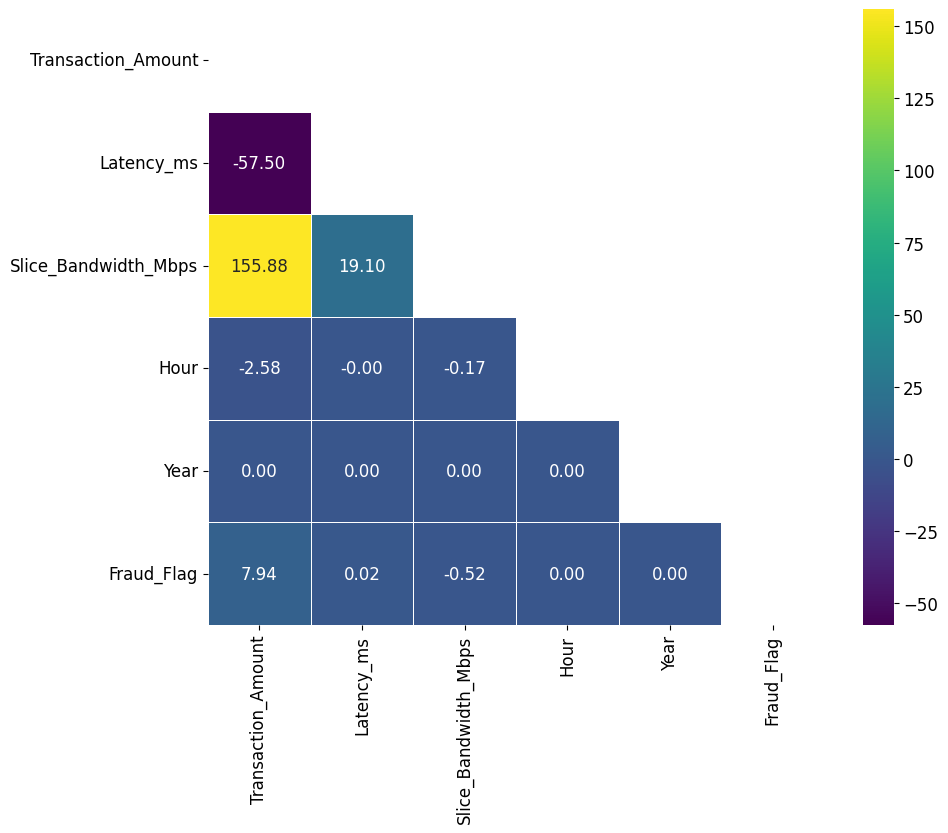

In [16]:
# Calculate the covariance matrix
covariance_matrix = data[num_cols].cov()

# Create a mask using numpy's triu function
mask = np.triu(np.ones_like(covariance_matrix, dtype=bool))

# Create a masked heatmap
plt.figure(figsize = (10,8))
plt.rcParams.update({'font.size': 12})
sns.heatmap(covariance_matrix, cmap = 'viridis', annot=True, fmt=".2f", square=True, linewidths=.5, mask = mask)
plt.show()

#### **Calculate correlation matrix and make a visual plot**

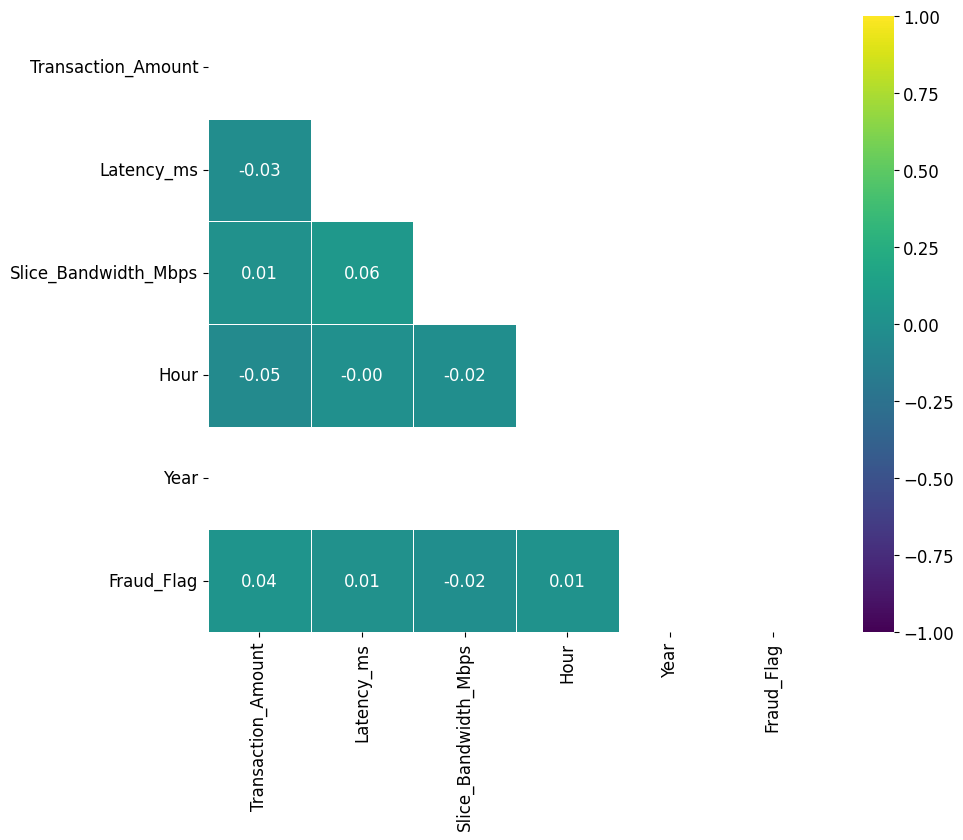

In [17]:
# Calculate the correlation matrix
correlation_matrix = data[num_cols].corr()

# Create a mask using numpy's triu function
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create a masked heatmap
plt.figure(figsize = (10,8))
plt.rcParams.update({'font.size': 12})
sns.heatmap(correlation_matrix, cmap = 'viridis', vmin = -1, vmax = 1, center = 0, annot=True, fmt=".2f", square=True, linewidths=.5, mask = mask)
plt.show()

#### **Investigate Distribution of numeric columns**

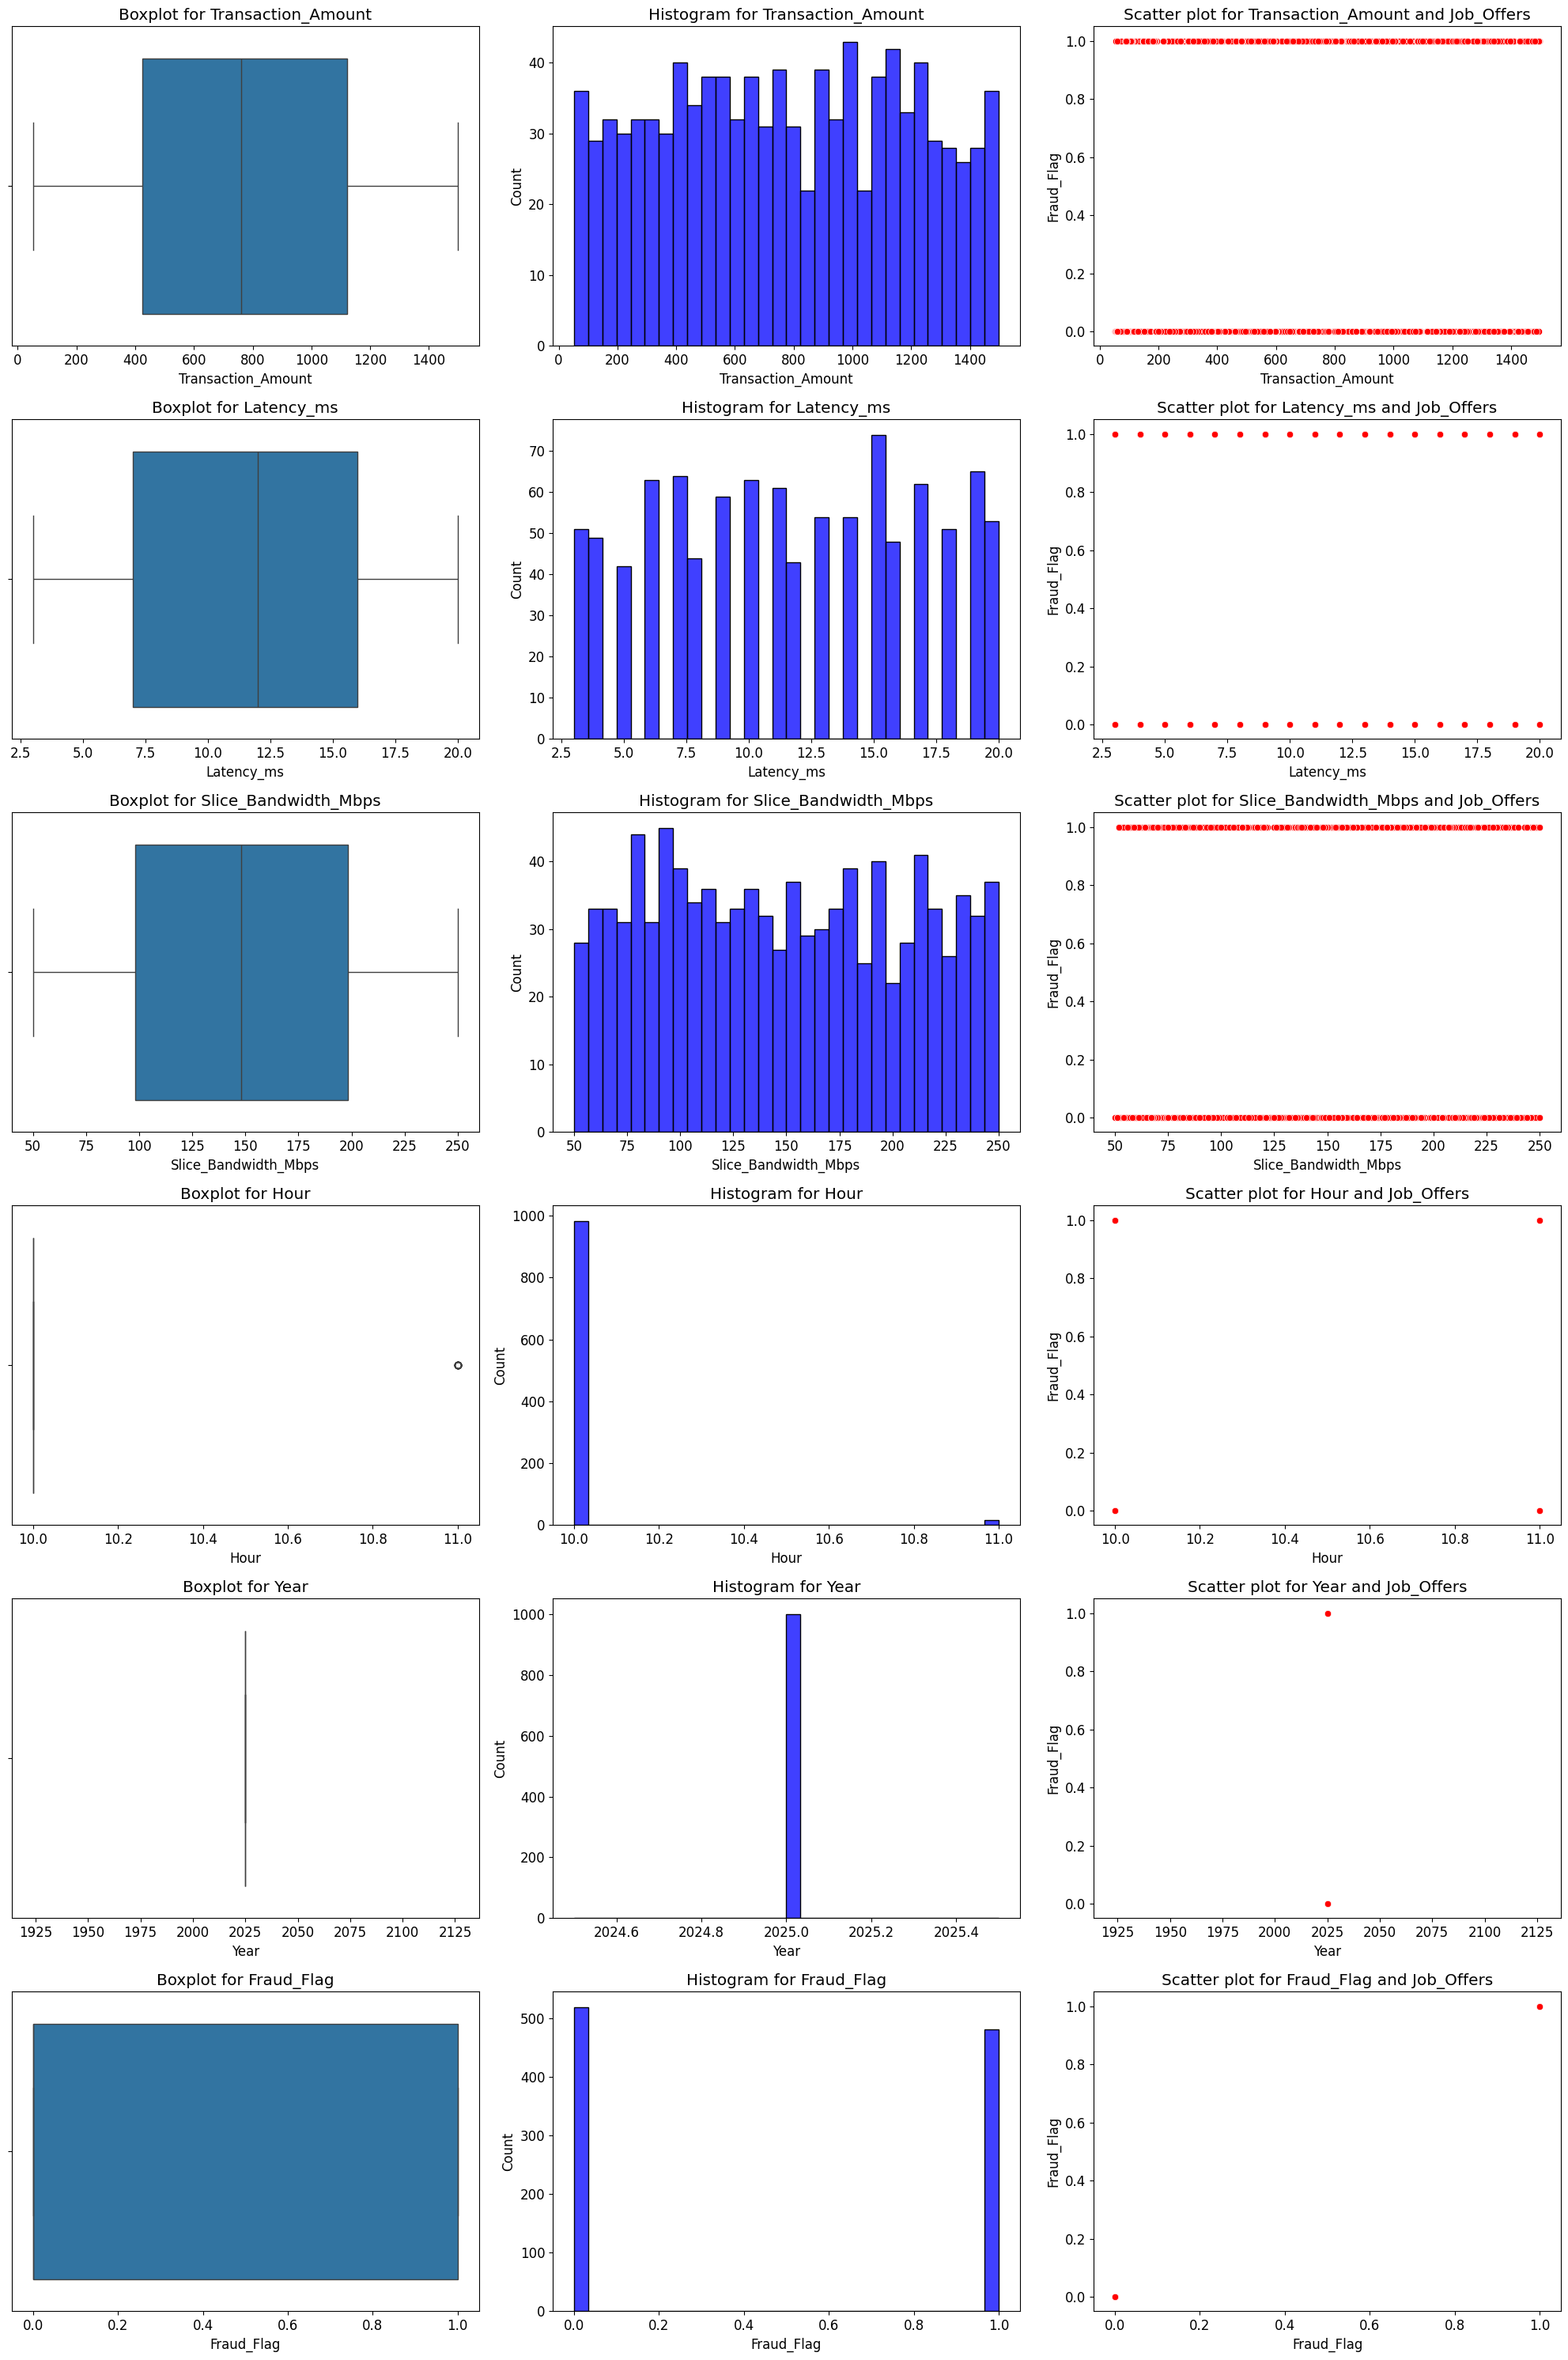

In [18]:
fig, axes = plt.subplots(len(num_cols), 3, figsize=(20, 5 * len(num_cols)))

for i, col in enumerate(num_cols):
    # Boxplot
    sns.boxplot(data=data, x=col, ax=axes[i, 0])
    axes[i, 0].set_title(f'Boxplot for {col}')
    axes[i, 0].set_xlabel(col)
    
    # Histogram
    sns.histplot(data[col], bins=30, color='blue', ax=axes[i, 1])
    axes[i, 1].set_title(f'Histogram for {col}')
    axes[i, 1].set_xlabel(col)
    
    # Scatter plot with Fraud Flag
    sns.scatterplot(data=data, x=col, y='Fraud_Flag', color='red', ax=axes[i, 2])
    axes[i, 2].set_title(f'Scatter plot for {col} and Job_Offers')
    axes[i, 2].set_xlabel(col)

plt.tight_layout()
plt.show()

**Stratified Table of descriptive statistics for numerical columns**

In [19]:
data.describe()

,Transaction_Amount,Latency_ms,Slice_Bandwidth_Mbps,Hour,Year,Fraud_Flag
count,1000.00000,1000.000000,1000.00000,1000.000000,1000.0,1000.000000
mean,771.16529,11.688000,148.51100,10.017000,2025.0,0.481000
std,411.01925,5.131958,57.78634,0.129336,0.0,0.499889
min,51.89000,3.000000,50.00000,10.000000,2025.0,0.000000
25%,423.34750,7.000000,98.00000,10.000000,2025.0,0.000000
50%,761.65500,12.000000,148.00000,10.000000,2025.0,0.000000
75%,1122.67250,16.000000,198.25000,10.000000,2025.0,1.000000
max,1497.76000,20.000000,250.00000,11.000000,2025.0,1.000000


#### **Investigate Distribution of categorical columns**

In [20]:
cat_cols = list(cat_cols)
cat_cols.append('Fraud_Flag')
print(cat_cols)

['Transaction_Type', 'Transaction_Status', 'Device_Used', 'Network_Slice_ID', 'Day', 'Month', 'Country', 'City', 'Fraud_Flag']


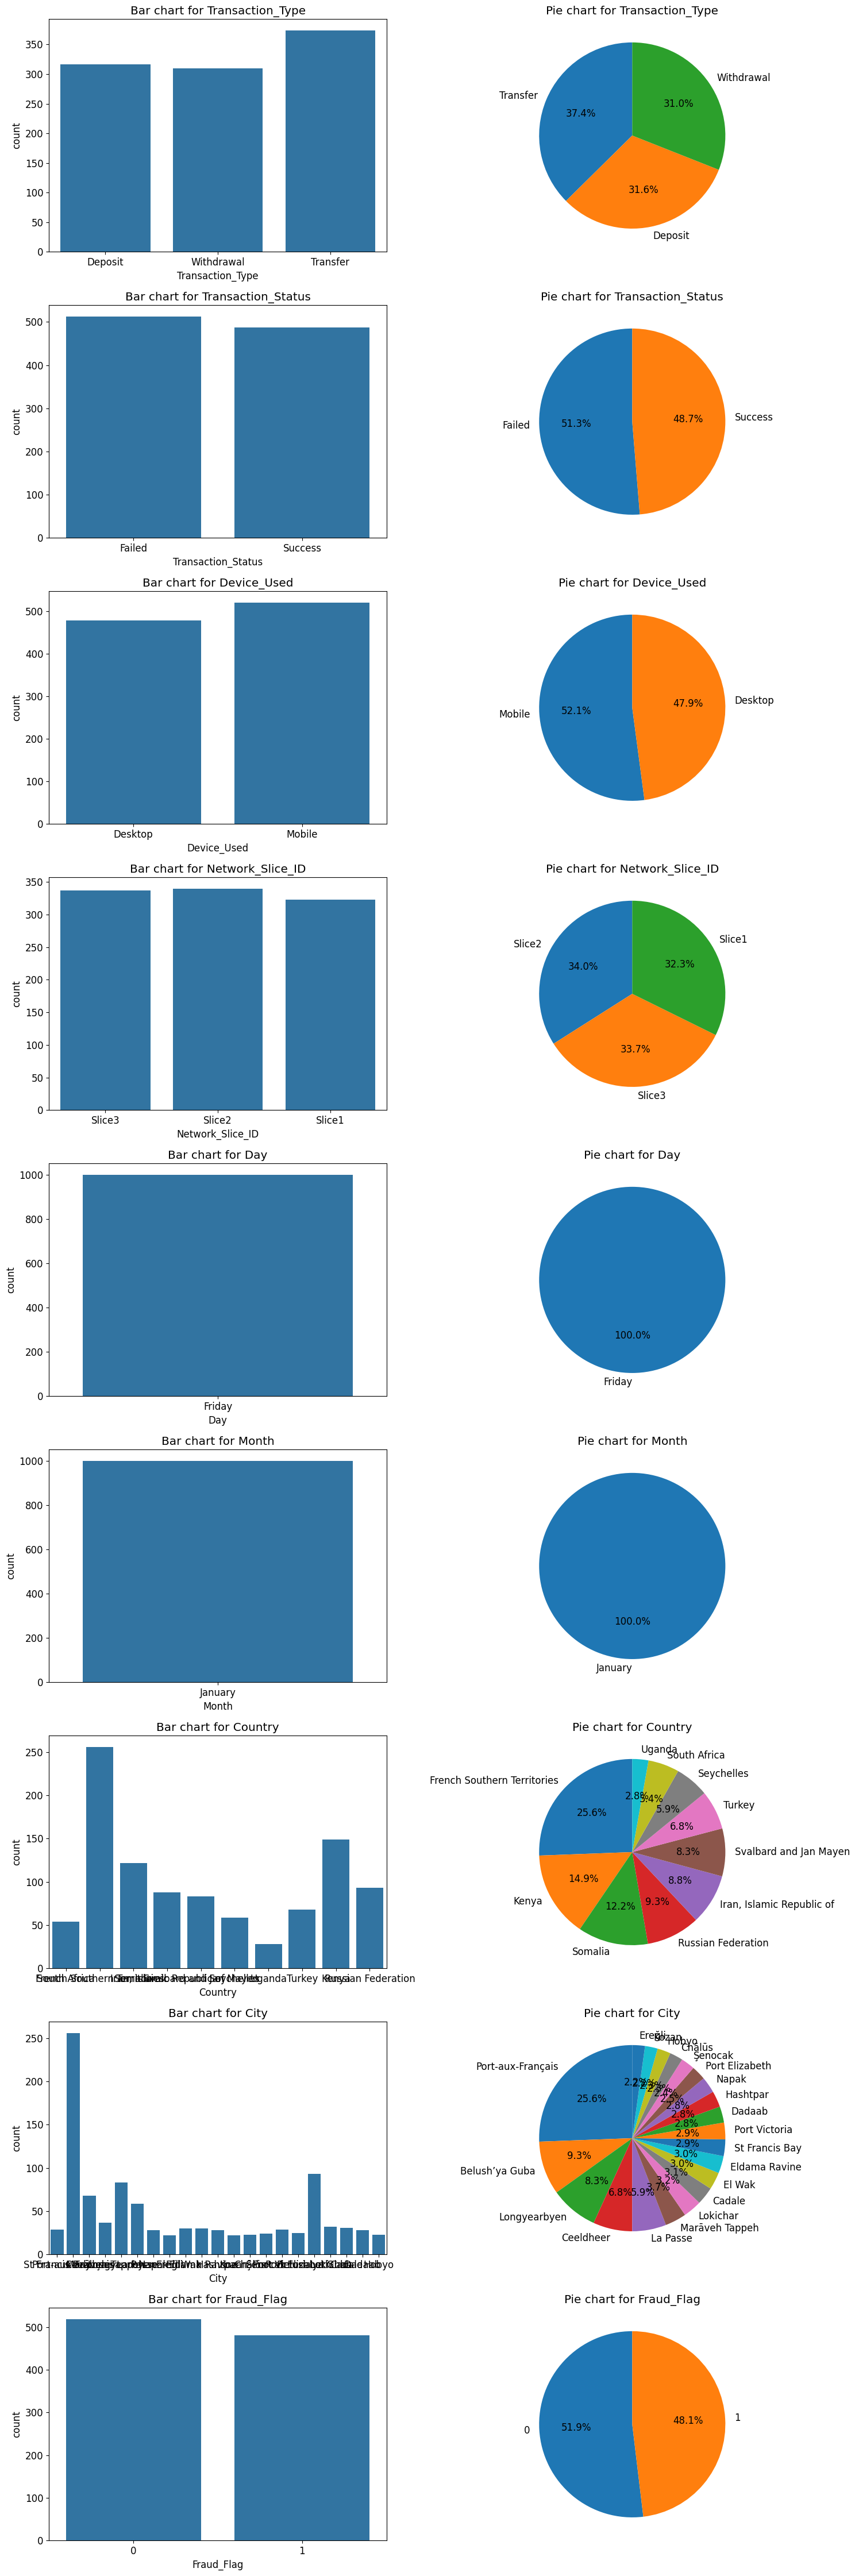

In [21]:
fig, axes = plt.subplots(len(cat_cols), 2, figsize=(15, 5 * len(cat_cols)))

for i, col in enumerate(cat_cols):
    # Bar chart
    sns.countplot(data=data, x=col, ax=axes[i, 0])
    axes[i, 0].set_title(f'Bar chart for {col}')
    axes[i, 0].set_xlabel(col)
    
    # Pie chart
    data[col].value_counts().plot.pie(ax=axes[i, 1], autopct='%1.1f%%', startangle=90)
    axes[i, 1].set_title(f'Pie chart for {col}')
    axes[i, 1].set_ylabel('')

plt.tight_layout()
plt.show()

#### **Numerical Encoding of categorical columns to make them model ready**

In [22]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Label encode Current_Job_Level and Entrepreneurship
label_encoder = LabelEncoder()
data['Transaction_Status'] = label_encoder.fit_transform(data['Transaction_Status']) 
data['Device_Used'] = label_encoder.fit_transform(data['Device_Used'])

# Dummy encode Gender and Field_of_Study
data = pd.get_dummies(data, columns=['Transaction_Type', 'Network_Slice_ID', 'Country'], dtype=int, drop_first=True)

In [23]:
# Drop columns all Identity columns
data = data.drop(['Day', 'Month', 'Year', 'City'], axis=1)
data.shape

(1000, 20)

In [24]:
# Rename a single column
data.rename(columns={'Country_Iran, Islamic Republic of': 'Country_Iran'}, inplace=True)

# # Rename multiple columns
# data.rename(columns={'Old_Column_Name1': 'New_Column_Name1', 'Old_Column_Name2': 'New_Column_Name2'}, inplace=True)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Transaction_Amount              1000 non-null   float64
 1   Transaction_Status              1000 non-null   int32  
 2   Device_Used                     1000 non-null   int32  
 3   Latency_ms                      1000 non-null   int64  
 4   Slice_Bandwidth_Mbps            1000 non-null   int64  
 5   Hour                            1000 non-null   int32  
 6   Fraud_Flag                      1000 non-null   int32  
 7   Transaction_Type_Transfer       1000 non-null   int32  
 8   Transaction_Type_Withdrawal     1000 non-null   int32  
 9   Network_Slice_ID_Slice2         1000 non-null   int32  
 10  Network_Slice_ID_Slice3         1000 non-null   int32  
 11  Country_Iran                    1000 non-null   int32  
 12  Country_Kenya                   100

**fix columns/variables that have spaces between names. spaces between variable names could/will present issues downstream with some models**

In [26]:
data.columns = data.columns.str.replace(' ','_')

#### **Final correlation matrix to investigate relationship between target variable and all predictor variables i.e. both Numerical and Categorical variables**

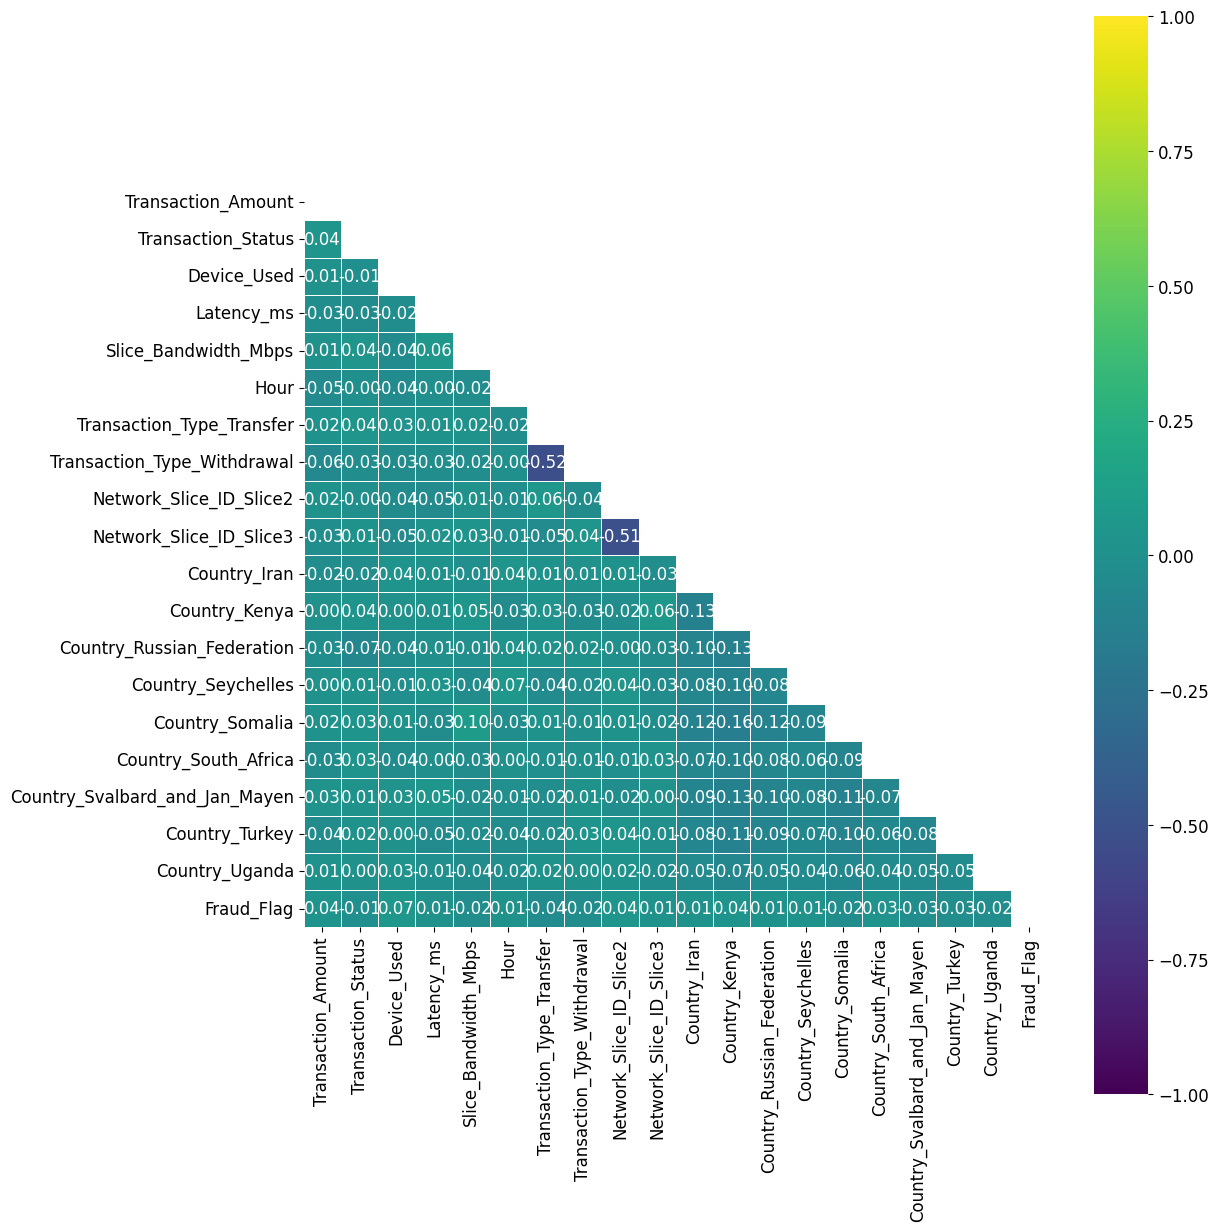

In [27]:
cols = ['Transaction_Amount', 'Transaction_Status', 'Device_Used', 'Latency_ms',
       'Slice_Bandwidth_Mbps', 'Hour',
       'Transaction_Type_Transfer', 'Transaction_Type_Withdrawal',
       'Network_Slice_ID_Slice2', 'Network_Slice_ID_Slice3', 'Country_Iran',
       'Country_Kenya', 'Country_Russian_Federation', 'Country_Seychelles',
       'Country_Somalia', 'Country_South_Africa',
       'Country_Svalbard_and_Jan_Mayen', 'Country_Turkey', 'Country_Uganda', 'Fraud_Flag']

data = data[cols]

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a mask using numpy's triu function
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create a masked heatmap
plt.figure(figsize = (12,14))
plt.rcParams.update({'font.size': 12})
sns.heatmap(correlation_matrix, cmap = 'viridis', vmin = -1, vmax = 1, center = 0, annot=True, fmt=".2f", square=True, linewidths=.5, mask = mask)
plt.show()

almost all variables seem to have a neutral relationship with the target variable (Fraud Flag)

In [32]:

print(num_cols)
n_cols = ['Transaction_Amount', 'Latency_ms', 'Slice_Bandwidth_Mbps', 'Hour', 'Fraud_Flag']

#num_cols = data[['Transaction_Amount', 'Latency_ms', 'Slice_Bandwidth_Mbps', 'Hour', 'Fraud_Flag']]

Index(['Transaction_Amount', 'Latency_ms', 'Slice_Bandwidth_Mbps', 'Hour',
       'Year', 'Fraud_Flag'],
      dtype='object')


## ANOVA

In [33]:
from statsmodels.formula.api import ols


import statsmodels.api as sm

# Perform ANOVA for each numerical column against the target variable 'Fraud_Flag'
anova_results = {}
for col in n_cols:
    if col != 'Fraud_Flag':  # Skip the target variable
        formula = f'{col} ~ C(Fraud_Flag)'
        model = ols(formula, data=data).fit()
        anova_table = sm.stats.anova_lm(model, typ=2)
        anova_results[col] = anova_table

# Display ANOVA results
for col, table in anova_results.items():
    print(f"ANOVA results for {col}:\n{table}\n")

ANOVA results for Transaction_Amount:
                     sum_sq     df         F    PR(>F)
C(Fraud_Flag)  2.521191e+05    1.0  1.493124  0.222021
Residual       1.685158e+08  998.0       NaN       NaN

ANOVA results for Latency_ms:
                     sum_sq     df        F    PR(>F)
C(Fraud_Flag)      1.034731    1.0  0.03925  0.842994
Residual       26309.621269  998.0      NaN       NaN

ANOVA results for Slice_Bandwidth_Mbps:
                     sum_sq     df         F    PR(>F)
C(Fraud_Flag)  1.082294e+03    1.0  0.323892  0.569406
Residual       3.334840e+06  998.0       NaN       NaN

ANOVA results for Hour:
                  sum_sq     df         F   PR(>F)
C(Fraud_Flag)   0.002713    1.0  0.162064  0.68735
Residual       16.708287  998.0       NaN      NaN



In [37]:
cat_cols
c_cols = ['Transaction_Type_Withdrawal', 'Network_Slice_ID_Slice2', 'Network_Slice_ID_Slice3', 'Country_Iran', 'Country_Kenya', 
          'Country_Russian_Federation', 'Country_Seychelles', 'Country_Somalia', 'Country_South_Africa', 'Country_Svalbard_and_Jan_Mayen', 'Country_Turkey', 'Country_Uganda']

## CAT COLS

In [38]:
from scipy.stats import chi2_contingency

# Initialize an empty list to store results
chi2_results = []

# Loop through each categorical column
for col in c_cols:
    if col != 'Fraud_Flag':  # Skip the target variable
        # Create a contingency table
        contingency_table = pd.crosstab(data[col], data['Fraud_Flag'])
        
        # Perform Chi-squared test
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        
        # Append the results
        chi2_results.append({'Variable': col, 'Chi2': chi2, 'p-value': p, 'Degrees of Freedom': dof})

# Convert results to a DataFrame
chi2_results_df = pd.DataFrame(chi2_results)

# Display the results
print(chi2_results_df)

                          Variable      Chi2   p-value  Degrees of Freedom
0      Transaction_Type_Withdrawal  0.397996  0.528126                   1
1          Network_Slice_ID_Slice2  1.433114  0.231257                   1
2          Network_Slice_ID_Slice3  0.035291  0.850988                   1
3                     Country_Iran  0.068559  0.793446                   1
4                    Country_Kenya  1.074132  0.300014                   1
5       Country_Russian_Federation  0.027938  0.867256                   1
6               Country_Seychelles  0.090669  0.763329                   1
7                  Country_Somalia  0.178050  0.673054                   1
8             Country_South_Africa  0.500345  0.479349                   1
9   Country_Svalbard_and_Jan_Mayen  0.616672  0.432287                   1
10                  Country_Turkey  0.650476  0.419942                   1
11                  Country_Uganda  0.137916  0.710362                   1


## MODELLING
#### **BASE MODEL TO SET A BENCHMARK**

Optimization terminated successfully.
         Current function value: 0.682956
         Iterations 4


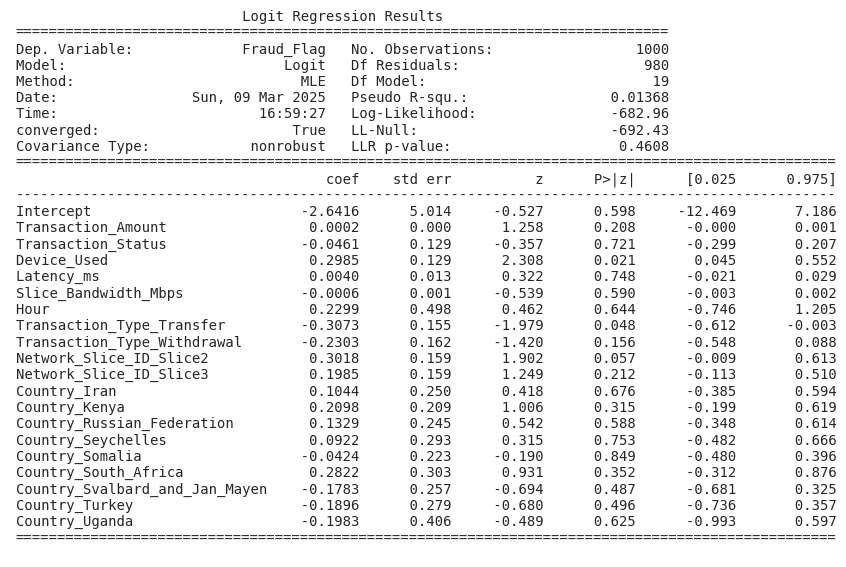

In [ ]:
import statsmodels.formula.api as smf
from tkinter import *
from PIL import ImageTk, Image

#create logistic regression model
model = smf.logit('Fraud_Flag ~ Transaction_Amount + Transaction_Status + Device_Used + Latency_ms + Slice_Bandwidth_Mbps + Hour + Transaction_Type_Transfer + Transaction_Type_Withdrawal + Network_Slice_ID_Slice2 + Network_Slice_ID_Slice3 + Country_Iran + Country_Kenya + Country_Russian_Federation + Country_Seychelles + Country_Somalia + Country_South_Africa + Country_Svalbard_and_Jan_Mayen + Country_Turkey + Country_Uganda', data=data).fit()

# #view model summary
# print(model.summary())

# pass the model results into a matplotlib figure and save as image
plt.rc('figure', figsize=(8, 5))
plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 10}, fontproperties = 'monospace')
plt.axis('off')
plt.tight_layout()
plt.savefig('results.png')

#### **Feature selection through backward stepwise regression**

Optimization terminated successfully.
         Current function value: 0.690265
         Iterations 4


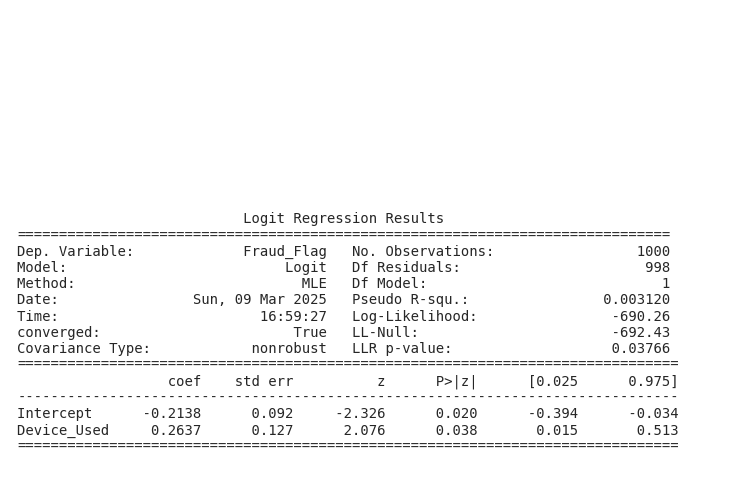

In [ ]:
#create logistic regression model
model = smf.logit('Fraud_Flag ~ Device_Used', data=data).fit()

# #view model summary
# print(model.summary())

# pass the model results into a matplotlib figure and save as image
plt.rc('figure', figsize=(8, 5))
plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 10}, fontproperties = 'monospace')
plt.axis('off')
plt.tight_layout()
plt.savefig('results.png')

Conducted backward stepwise regression to filter out variables that weren't significant at predicting fraud using a logistic regression model. **"Device used"** is the only variable that was significant at predicting fraud

#### **COMPARISON OF MULTIPLE MODELS USING ALL MODEL SELECTED FEATURES - AUTOML (PYCARET)**

In [ ]:
# import pycaret classification and init setup
from pycaret.classification import *
s = setup(data, target = 'Fraud_Flag', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Fraud_Flag
2,Target type,Binary
3,Original data shape,"(1000, 20)"
4,Transformed data shape,"(1000, 20)"
5,Transformed train set shape,"(700, 20)"
6,Transformed test set shape,"(300, 20)"
7,Numeric features,19
8,Preprocess,True
9,Imputation type,simple


In [ ]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.5514,0.5541,0.5250,0.5391,0.5288,0.1012,0.1025,0.0040
catboost,CatBoost Classifier,0.5500,0.5467,0.5249,0.5339,0.5272,0.0979,0.0985,0.2550
lightgbm,Light Gradient Boosting Machine,0.5357,0.5369,0.4930,0.5192,0.5036,0.0689,0.0691,0.0910
xgboost,Extreme Gradient Boosting,0.5300,0.5267,0.5225,0.5089,0.5129,0.0598,0.0601,0.0270
gbc,Gradient Boosting Classifier,0.5286,0.5243,0.5074,0.5105,0.5068,0.0558,0.0562,0.0140
rf,Random Forest Classifier,0.5257,0.5418,0.4691,0.5083,0.4849,0.0479,0.0484,0.0230
lda,Linear Discriminant Analysis,0.5257,0.5165,0.4506,0.5068,0.4753,0.0456,0.0459,0.0050
dt,Decision Tree Classifier,0.5243,0.5254,0.5374,0.5040,0.5159,0.0508,0.0507,0.0040
ridge,Ridge Classifier,0.5243,0.5170,0.4477,0.5052,0.4729,0.0427,0.0430,0.0040
lr,Logistic Regression,0.5214,0.5204,0.4416,0.5007,0.4671,0.0365,0.0364,0.0120


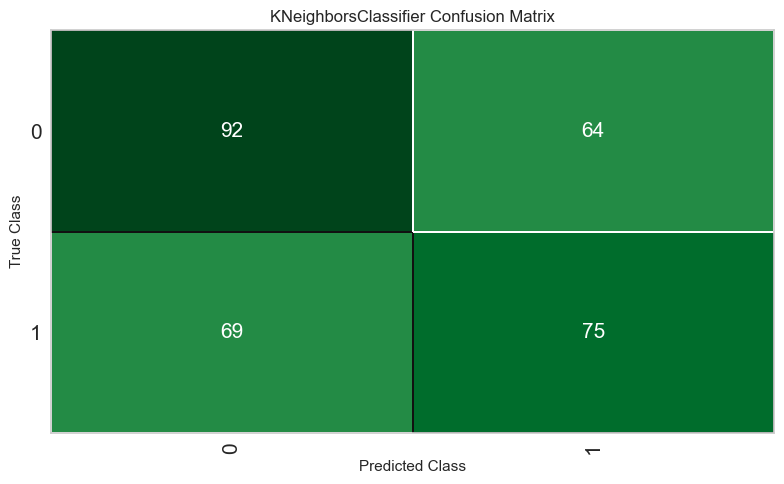

In [ ]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

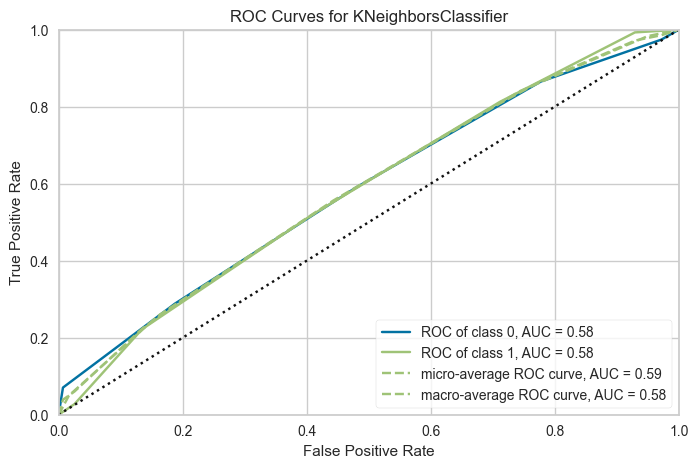

In [ ]:
# plot AUC
plot_model(best, plot = 'auc')